# Support Vector Machines

# [Mushroom Classification](https://www.kaggle.com/uciml/mushroom-classification)

## Content
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information: (classes: edible=e, poisonous=p)
- **cap-shape:** 
    - bell=b,
    - conical=c,
    - convex=x,
    - flat=f, 
    - knobbed=k,
    - sunken=s
- **cap-surface:** 
    - fibrous=f,
    - grooves=g,
    - scaly=y,
    - smooth=s
- **cap-color:** 
    - brown=n,
    - buff=b,
    - cinnamon=c,
    - gray=g,
    - green=r,
    - pink=p,
    - purple=u,
    - red=e,
    - white=w,
    - yellow=y
- **bruises:** 
    - bruises=t,
    - no=f
- **odor:** 
    - almond=a,
    - anise=l,
    - creosote=c,
    - fishy=y,
    - foul=f,
    - musty=m,
    - none=n,
    - pungent=p,
    - spicy=s
- **gill-attachment:** 
    - attached=a,
    - descending=d,
    - free=f,
    - notched=n
- **gill-spacing:** 
    - close=c,
    - crowded=w,
    - distant=d
- **gill-size:** 
    - broad=b,
    - narrow=n
- **gill-color:** 
    - black=k,
    - brown=n,
    - buff=b,
    - chocolate=h,
    - gray=g, 
    - green=r,
    - orange=o,
    - pink=p,
    - purple=u,
    - red=e,
    - white=w,
    - yellow=y
- **stalk-shape:** 
    - enlarging=e,
    - tapering=t
- **stalk-root:** 
    - bulbous=b,
    - club=c,
    - cup=u,
    - equal=e,
    - rhizomorphs=z,
    - rooted=r,
    - missing=?
- **stalk-surface-above-ring:** 
    - fibrous=f,
    - scaly=y,
    - silky=k,
    - smooth=s
- **stalk-surface-below-ring:** 
    - fibrous=f,
    - scaly=y,
    - silky=k,
    - smooth=s
- **stalk-color-above-ring:** 
    - brown=n,
    - buff=b,
    - cinnamon=c,
    - gray=g,
    - orange=o,
    - pink=p,
    - red=e,
    - white=w,
    - yellow=y
- **stalk-color-below-ring:** 
    - brown=n,
    - buff=b,
    - cinnamon=c,
    - gray=g,
    - orange=o,
    - pink=p,
    - red=e,
    - white=w,
    - yellow=y
- **veil-type:** 
    - partial=p,
    - universal=u
- **veil-color:** 
    - brown=n,
    - orange=o,
    - white=w,
    - yellow=y
- **ring-number:** 
    - none=n,
    - one=o,
    - two=t
- **ring-type:** 
    - cobwebby=c,
    - evanescent=e,
    - flaring=f,
    - large=l,
    - none=n,
    - pendant=p,
    - sheathing=s,
    - zone=z
- **spore-print-color:** 
    - black=k,
    - brown=n,
    - buff=b,
    - chocolate=h,
    - green=r,
    - orange=o,
    - purple=u,
    - white=w,
    - yellow=y
- **population:** 
    - abundant=a,
    - clustered=c,
    - numerous=n,
    - scattered=s,
    - several=v,
    - solitary=y
- **habitat:** 
    - grasses=g,
    - leaves=l,
    - meadows=m,
    - paths=p,
    - urban=u,
    - waste=w,
    - woods=d

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
cc = df['class'].value_counts()
cc

e    4208
p    3916
Name: class, dtype: int64

In [6]:
cc.plot(kind = 'bar')

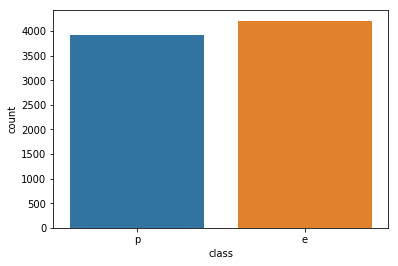

In [7]:
import seaborn as sns

sns.countplot(df['class'])

In [8]:
from sklearn.preprocessing import LabelEncoder
def lbc():
    Lbc = LabelEncoder()
    for col in df.columns:
        df[col] = Lbc.fit_transform(df[col])
    return
lbc()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
Y = df['class']
X = df.drop('class',axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [11]:
from sklearn.svm import SVC

svc_clf = SVC(degree=3,kernel='poly',probability=True)

svc_clf.fit(X_train,Y_train)

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
Y_pred = svc_clf.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

acc = accuracy_score(Y_test,Y_pred)
confusion_matrix(Y_test,Y_pred)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [13]:
acc

1.0

In [14]:
y_pro = svc_clf.predict_proba(X_test)

In [15]:
y_pro

array([[9.99999370e-01, 6.29626941e-07],
       [1.91041554e-09, 9.99999998e-01],
       [2.64532129e-08, 9.99999974e-01],
       ...,
       [9.01805101e-06, 9.99990982e-01],
       [9.99999900e-01, 1.00000010e-07],
       [9.99767635e-01, 2.32365280e-04]])

In [16]:
y_pro[:,:1]

array([[9.99999370e-01],
       [1.91041554e-09],
       [2.64532129e-08],
       ...,
       [9.01805101e-06],
       [9.99999900e-01],
       [9.99767635e-01]])